In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from feature_selectors import *

# # Suppress the specific warning
# import warnings
# 
# warnings.filterwarnings("ignore", category = UserWarning)

In [16]:
gebruikers_df = pd.read_csv(r'..\..\..\data\gebruikersinformatie.csv', delimiter = ';')
evenement_df = pd.read_csv(r'..\..\..\data\evenementinformatie.csv', delimiter = ';')
aanwezigheid_df = pd.read_csv(r'..\..\..\data\evenementaanwezigheid.csv', delimiter = ';')
bericht_df = pd.read_csv(r'..\..\..\data\berichtinteracties_met_sentiment.csv', delimiter = ';')

In [17]:
# df = merge_on_all(bericht_df, evenement_df, gebruikers_df, aanwezigheid_df)
df = merge_on_aanwezigheid(aanwezigheid_df, evenement_df, gebruikers_df)
# df = merge_on_bericht(bericht_df, evenement_df, gebruikers_df)

df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,e001,g123,bijgewoond,bbq,24-2-2023,g296,15-5-2023,11-12-2023,19.0,data engineering,eerstejaars,regulier
1,e001,g296,bijgewoond,bbq,24-2-2023,g296,6-9-2023,18-3-2024,22.0,security & cloud,eerstejaars,premium
2,e001,g032,geregistreerd,bbq,24-2-2023,g296,4-1-2023,19-5-2023,17.0,data engineering,tweedejaars,regulier
3,e001,g217,bijgewoond,bbq,24-2-2023,g296,13-8-2023,18-1-2024,24.0,data engineering,vierdejaars,regulier
4,e001,g162,geregistreerd,bbq,24-2-2023,g296,21-8-2023,8-5-2024,18.0,human computer interaction,tweedejaars,regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3427,e040,g121,geregistreerd,workshop,19-2-2023,g215,15-10-2023,14-1-2024,24.0,human computer interaction,tweedejaars,premium
3428,e040,g170,afwezig,workshop,19-2-2023,g215,2-6-2023,2-6-2023,23.0,software engineering,derdejaars,premium
3429,e040,g141,bijgewoond,workshop,19-2-2023,g215,2-11-2023,18-4-2024,17.0,security & cloud,derdejaars,regulier
3430,e040,g176,geregistreerd,workshop,19-2-2023,g215,11-7-2023,15-8-2023,30.0,human computer interaction,tweedejaars,regulier


In [18]:
# Remove nonvalid entries
for col in df.columns:
    df = df[~(df[col].isna())]

df = df[~(df['Gebruiker_Lidmaatschapstype'] == 'x')]
df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,e001,g123,bijgewoond,bbq,24-2-2023,g296,15-5-2023,11-12-2023,19.0,data engineering,eerstejaars,regulier
1,e001,g296,bijgewoond,bbq,24-2-2023,g296,6-9-2023,18-3-2024,22.0,security & cloud,eerstejaars,premium
2,e001,g032,geregistreerd,bbq,24-2-2023,g296,4-1-2023,19-5-2023,17.0,data engineering,tweedejaars,regulier
3,e001,g217,bijgewoond,bbq,24-2-2023,g296,13-8-2023,18-1-2024,24.0,data engineering,vierdejaars,regulier
4,e001,g162,geregistreerd,bbq,24-2-2023,g296,21-8-2023,8-5-2024,18.0,human computer interaction,tweedejaars,regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3427,e040,g121,geregistreerd,workshop,19-2-2023,g215,15-10-2023,14-1-2024,24.0,human computer interaction,tweedejaars,premium
3428,e040,g170,afwezig,workshop,19-2-2023,g215,2-6-2023,2-6-2023,23.0,software engineering,derdejaars,premium
3429,e040,g141,bijgewoond,workshop,19-2-2023,g215,2-11-2023,18-4-2024,17.0,security & cloud,derdejaars,regulier
3430,e040,g176,geregistreerd,workshop,19-2-2023,g215,11-7-2023,15-8-2023,30.0,human computer interaction,tweedejaars,regulier


In [19]:
# Convert ID to ints
to_convert = ["BerichtID", "EvenementID", "GebruikerID", "Evenement_OrganisatorID"]

for col in to_convert:
    if col in df.columns:
        df[col] = df[col].str[1:].astype(int)
    
df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,123,bijgewoond,bbq,24-2-2023,296,15-5-2023,11-12-2023,19.0,data engineering,eerstejaars,regulier
1,1,296,bijgewoond,bbq,24-2-2023,296,6-9-2023,18-3-2024,22.0,security & cloud,eerstejaars,premium
2,1,32,geregistreerd,bbq,24-2-2023,296,4-1-2023,19-5-2023,17.0,data engineering,tweedejaars,regulier
3,1,217,bijgewoond,bbq,24-2-2023,296,13-8-2023,18-1-2024,24.0,data engineering,vierdejaars,regulier
4,1,162,geregistreerd,bbq,24-2-2023,296,21-8-2023,8-5-2024,18.0,human computer interaction,tweedejaars,regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3427,40,121,geregistreerd,workshop,19-2-2023,215,15-10-2023,14-1-2024,24.0,human computer interaction,tweedejaars,premium
3428,40,170,afwezig,workshop,19-2-2023,215,2-6-2023,2-6-2023,23.0,software engineering,derdejaars,premium
3429,40,141,bijgewoond,workshop,19-2-2023,215,2-11-2023,18-4-2024,17.0,security & cloud,derdejaars,regulier
3430,40,176,geregistreerd,workshop,19-2-2023,215,11-7-2023,15-8-2023,30.0,human computer interaction,tweedejaars,regulier


In [20]:
# Convert columns to days since earliest date
date_columns = ['BerichtDatum', 'Evenement_EvenementDatum', 'Gebruiker_RegistratieDatum', 'Gebruiker_LaatsteLogin']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], dayfirst = True)
        df[col] = (df[col] - df[col].min()).dt.total_seconds() / (24 * 3600)

df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,123,bijgewoond,bbq,49.0,296,134.0,325.0,19.0,data engineering,eerstejaars,regulier
1,1,296,bijgewoond,bbq,49.0,296,248.0,423.0,22.0,security & cloud,eerstejaars,premium
2,1,32,geregistreerd,bbq,49.0,296,3.0,119.0,17.0,data engineering,tweedejaars,regulier
3,1,217,bijgewoond,bbq,49.0,296,224.0,363.0,24.0,data engineering,vierdejaars,regulier
4,1,162,geregistreerd,bbq,49.0,296,232.0,474.0,18.0,human computer interaction,tweedejaars,regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3427,40,121,geregistreerd,workshop,44.0,215,287.0,359.0,24.0,human computer interaction,tweedejaars,premium
3428,40,170,afwezig,workshop,44.0,215,152.0,133.0,23.0,software engineering,derdejaars,premium
3429,40,141,bijgewoond,workshop,44.0,215,305.0,454.0,17.0,security & cloud,derdejaars,regulier
3430,40,176,geregistreerd,workshop,44.0,215,191.0,207.0,30.0,human computer interaction,tweedejaars,regulier


In [21]:
# Factorize studiejaar with map
df["Gebruiker_Studiejaar"] = df["Gebruiker_Studiejaar"].map({
    "eerstejaars": 1,
    "tweedejaars": 2,
    "derdejaars": 3,
    "vierdejaars": 4
})

# Object (string) columns
for col in df.select_dtypes(include = ['object']).columns:
    df[col], unique_values = pd.factorize(df[col])

    print(f"\n{col} numerics:")
    for i, value in enumerate(unique_values):
        print(f"{i} -> {value}")
        
# # Change range from -1 (negatief) to 1 (positief)
# df['BerichtSentiment'] = df['BerichtSentiment'].replace(2, -1)

# Aanwezigheidsstatus (1 = aanwezig, 0 = afwezig)
df['Aanwezigheidsstatus'] = ~df['Aanwezigheidsstatus'].replace(2, 1).astype('bool', )

df


Aanwezigheidsstatus numerics:
0 -> bijgewoond
1 -> geregistreerd
2 -> afwezig

Evenement_EvenementType numerics:
0 -> bbq
1 -> lezing
2 -> hackathon
3 -> workshop

Gebruiker_Studierichting numerics:
0 -> data engineering
1 -> security & cloud
2 -> human computer interaction
3 -> software engineering

Gebruiker_Lidmaatschapstype numerics:
0 -> regulier
1 -> premium


,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,123,True,0,49.0,296,134.0,325.0,19.0,0,1,0
1,1,296,True,0,49.0,296,248.0,423.0,22.0,1,1,1
2,1,32,False,0,49.0,296,3.0,119.0,17.0,0,2,0
3,1,217,True,0,49.0,296,224.0,363.0,24.0,0,4,0
4,1,162,False,0,49.0,296,232.0,474.0,18.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3427,40,121,False,3,44.0,215,287.0,359.0,24.0,2,2,1
3428,40,170,False,3,44.0,215,152.0,133.0,23.0,3,3,1
3429,40,141,True,3,44.0,215,305.0,454.0,17.0,1,3,0
3430,40,176,False,3,44.0,215,191.0,207.0,30.0,2,2,0


In [22]:
# Define predictors (dimensions)
predictors = df.columns.tolist()
# predictors.remove('BerichtID')
predictors.remove('GebruikerID')
predictors.remove('EvenementID')
predictors.remove('Evenement_OrganisatorID')

In [25]:
# Scale data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[predictors])
scaled_df = pd.DataFrame(scaled_data, columns = predictors)

Most frequent best K: 3


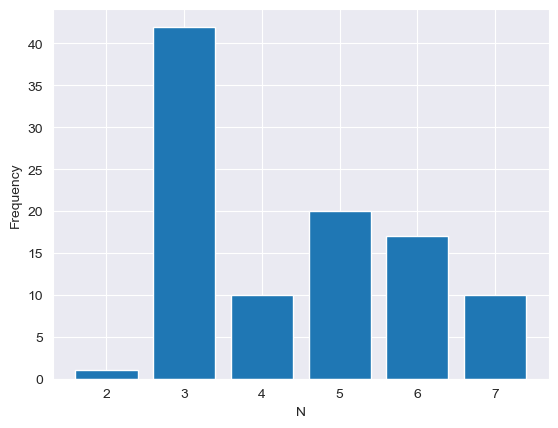

In [27]:
states = 100
max_n = 10 # Best N is afhankelijk van max_n? i am confusion
best_n_frequency = {}

# For each randomstate
for state in range(states):
    # Save score on each N
    inertias = [KMeans(n_clusters = n, random_state = state).fit(scaled_df).inertia_ for n in range(1, max_n)]

    # Determine N with best score
    knee_locator = KneeLocator(range(1, max_n), inertias, curve = "convex", direction = "decreasing")
    best_n = knee_locator.knee

    # Add a frequency point to that N
    best_n_frequency[best_n] = best_n_frequency.get(best_n, 0) + 1

# Determine most frequent best N
most_frequent_best_n = max(best_n_frequency, key = best_n_frequency.get)

# Plot results
print(f'Most frequent best K: {most_frequent_best_n}')
plt.bar(best_n_frequency.keys(), best_n_frequency.values())
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

# Train model one last time with most frequent best N
kmeans = KMeans(n_clusters = most_frequent_best_n, random_state = 0).fit(scaled_df)

In [28]:
# Showing distribution of cluster sizes
unique_clusters, counts = np.unique(kmeans.labels_, return_counts = True)

print("\nCluster Size Distribution:")
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} entries")


Cluster Size Distribution:
Cluster 0: 952 entries
Cluster 1: 1337 entries
Cluster 2: 1057 entries
